In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
#order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        #'CD4 effector memory','CD4 central memory']
file = '/Users/irffanalahi/Research/Research_update/Results_together/Bilge_parallel/summarize_result/MAHORLINEAGE_SM/deconresult_gt/BS_majorlineageSM.txt_ALL_melanoma_cfDNA_gt.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)



order=df.columns.tolist()
order.remove('Toxicity')
#order.remove('Total')
order.remove('Response')

In [3]:
df = df[df['Toxicity'].notna()]

In [4]:
conditions = [(df['Toxicity'] <= cutoff), (df['Toxicity'] > cutoff)]
values = ['toxicity <= ' + str(cutoff), 'toxicity > ' + str(cutoff)]
df['Toxic'] = np.select(conditions, values)
df

,Mono,Bcell,CD4,CD8,NK,Response,Toxicity,Toxic
Mixture,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,56.196056,8.166483,15.055818,9.405084,11.176560,DCB,1.0,toxicity <= 2
tot-YUTAUR_19-3926-cfDNA,66.816954,7.747746,8.433764,8.161446,8.840090,NDB,3.0,toxicity > 2
tot-YUTHEA_20-4000-cfDNA,51.557802,11.538136,12.270180,11.464133,13.169749,DCB,1.0,toxicity <= 2
Y-3674-cfDNA,64.967443,6.123511,7.537161,7.654764,13.717121,DCB,0.0,toxicity <= 2
Y-3688-cfDNA,44.519744,11.976250,13.739127,11.347472,18.417407,NDB,3.0,toxicity > 2
Y-3703-cfDNA,51.785331,8.075110,12.069571,11.975249,16.094739,DCB,3.0,toxicity > 2
Y-3707-cfDNA,52.618689,7.623601,9.958169,11.016241,18.783299,NDB,0.0,toxicity <= 2
Y-3715-cfDNA,63.503890,7.366075,10.627595,10.489795,8.012646,DCB,3.0,toxicity > 2
Y-3814-cfDNA,60.986358,10.549844,9.881133,7.411189,11.171476,DCB,2.0,toxicity <= 2


In [5]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.mean(p_val_list[0]) >= np.mean(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'Mono': -0.020901906350527823,
 'Bcell': -0.020901906350527823,
 'CD4': 0.06566125951523769,
 'CD8': 0.5802253778216345,
 'NK': -0.06566125951523769}

In [6]:
type(p_vals)
p_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}
print(p_vals)
order=p_vals.keys()
print(order)

{'NK': -0.06566125951523769, 'Mono': -0.020901906350527823, 'Bcell': -0.020901906350527823, 'CD4': 0.06566125951523769, 'CD8': 0.5802253778216345}
dict_keys(['NK', 'Mono', 'Bcell', 'CD4', 'CD8'])


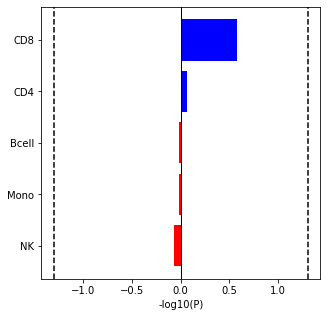

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='r')
    else:
        ax.barh(cell, y, color='b')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.axvline(x=np.log10(0.05), linewidth=1.5, color='k', ls='--')
#ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_cutoff_'+str(cutoff)+'_toxicity_barplot_mean.pdf', bbox_inches='tight')